In [1]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split



In [2]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### Functions start here.

In [3]:
# Functions Start Here. #######################################################
###############################################################################

def fill_the_column_na() -> None:
    
    # Replace NaN values with new value.***************************************

    rent_df['pets_allowed'].fillna('No Pets', inplace=True)
    rent_df['amenities'].fillna('None', inplace=True)
    rent_df['bathrooms'].fillna(0, inplace=True)
    rent_df['bedrooms'].fillna(0, inplace=True)
    rent_df['address'].fillna('Undisclosed', inplace=True)
    rent_df['cityname'].fillna('Undisclosed', inplace=True)
    rent_df['state'].fillna('Unknown', inplace=True)
    
###############################################################################


def calculate_kmeans_scores (num_k: int, max_inters = 50, verb =1) -> pd.DataFrame() :
    
  
  k_val = []                 # Number of clusters.         
  inertia = []               # Holds the inertia scores for the Kmeans model.
  sil_score = []             # Holds the silhouette score the Kmeans model.
  
  scores_df = pd.DataFrame()  # Create the dataframe for the scores and values.
  
  for k in range(2, num_k, 1):
      
      k_means = KMeans(n_clusters=k, random_state=247, init='k-means++'
                         ,algorithm='elkan', max_iter=max_inters, verbose =verb)
      
      # Fit the model. ***********************
      k_means.fit(X_train_norm)
      
      # Retrieve the values for each value of K. *********
      k_val.append(k)
      inertia.append(k_means.inertia_)
      sil_score.append(silhouette_score(X_train_norm, k_means.labels_))
      
  # Add teh values to the scores dataframe. ***********************
  scores_df['k_val'] = k_val
  scores_df['inertia_value'] = inertia
  scores_df['sil_score'] = sil_score
  
  return scores_df

###############################################################################

def convert_pets_allowed () -> None:
    
    for index in range(0, rent_df.shape[0]):
        
       # print("INDEX: ", index)
        
        #print("Value", rent_df["pets_allowed"][index])
        if rent_df['pets_allowed'][index] == "Cats,Dogs":
            #print("\nIN IF: ")
           # print("Value: ", rent_df["pets_allowed"][index])
            rent_df.at[index, 'Dogs'] = "Yes"
            rent_df.at[index, 'Cats'] = "Yes"
            
        elif rent_df['pets_allowed'][index] == "Cats":
            #print("\nIN IF: ")
            rent_df.at[index, 'Dogs'] = "No"
            rent_df.at[index, 'Cats'] = "Yes"
        elif rent_df['pets_allowed'][index] == "Dogs":
            rent_df.at[index, 'Dogs'] = "Yes"
            rent_df.at[index, 'Cats'] = "No"
        elif rent_df['pets_allowed'][index] == "":
            #print("\nIN ELSE: ")
            rent_df.at[index, 'Dogs'] = "No"
            rent_df.at[index, 'Cats'] = "No"
        else:
           rent_df.at[index, 'Dogs'] = "No"
           rent_df.at[index, 'Cats'] = "No"
    
###############################################################################
# Functions End Here. #########################################################
###############################################################################

### Read in the file from the CSV file.

In [4]:
# Read in the file from the CSV file. *****************************************
rent_df = pd.read_csv('apartments_for_rent_classified_10K.csv', sep=';', header=0)

### Clean the data.

In [5]:
fill_the_column_na()

### Convert the pets_allowed column

In [6]:
convert_pets_allowed ()


### Create a scatterplot of Longitude and lattitude.

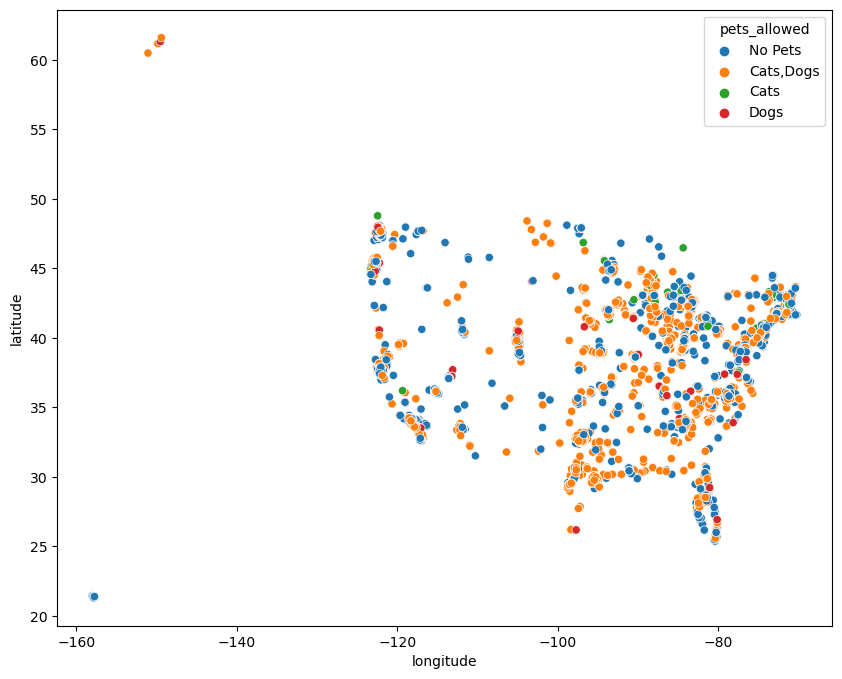

In [7]:
figure, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(data=rent_df, x='longitude', y='latitude', hue='pets_allowed')

### Drop any empty lattitude or longitude rows that are empty.

In [8]:
rent_df.dropna(subset=['latitude', 'longitude'], inplace=True)

### Split the data into training sets.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(rent_df[['latitude','longitude',]], rent_df[['price',]]
                                                    , test_size=0.20, train_size=0.80, random_state=247)

### Normalize the data for future use.

In [10]:
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

###  Create the KMeans obkject.

Calcluate tthe interia and the silhouette scores for the various number of clusters.

In [11]:
Kmeans_scores = calculate_kmeans_scores(num_k=50, verb=0)

In [12]:
Kmeans_scores

,k_val,inertia_value,sil_score
0,2,10.644509,0.647980
1,3,5.080237,0.627920
2,4,2.795346,0.634049
3,5,2.016834,0.622437
4,6,1.396252,0.602743
5,7,1.155275,0.601414
6,8,0.904449,0.613860
7,9,0.662381,0.613390
8,10,0.503461,0.643262
9,11,0.331967,0.668505


### Print a visual of the scores and the values for the Kmeans clustering K values. 

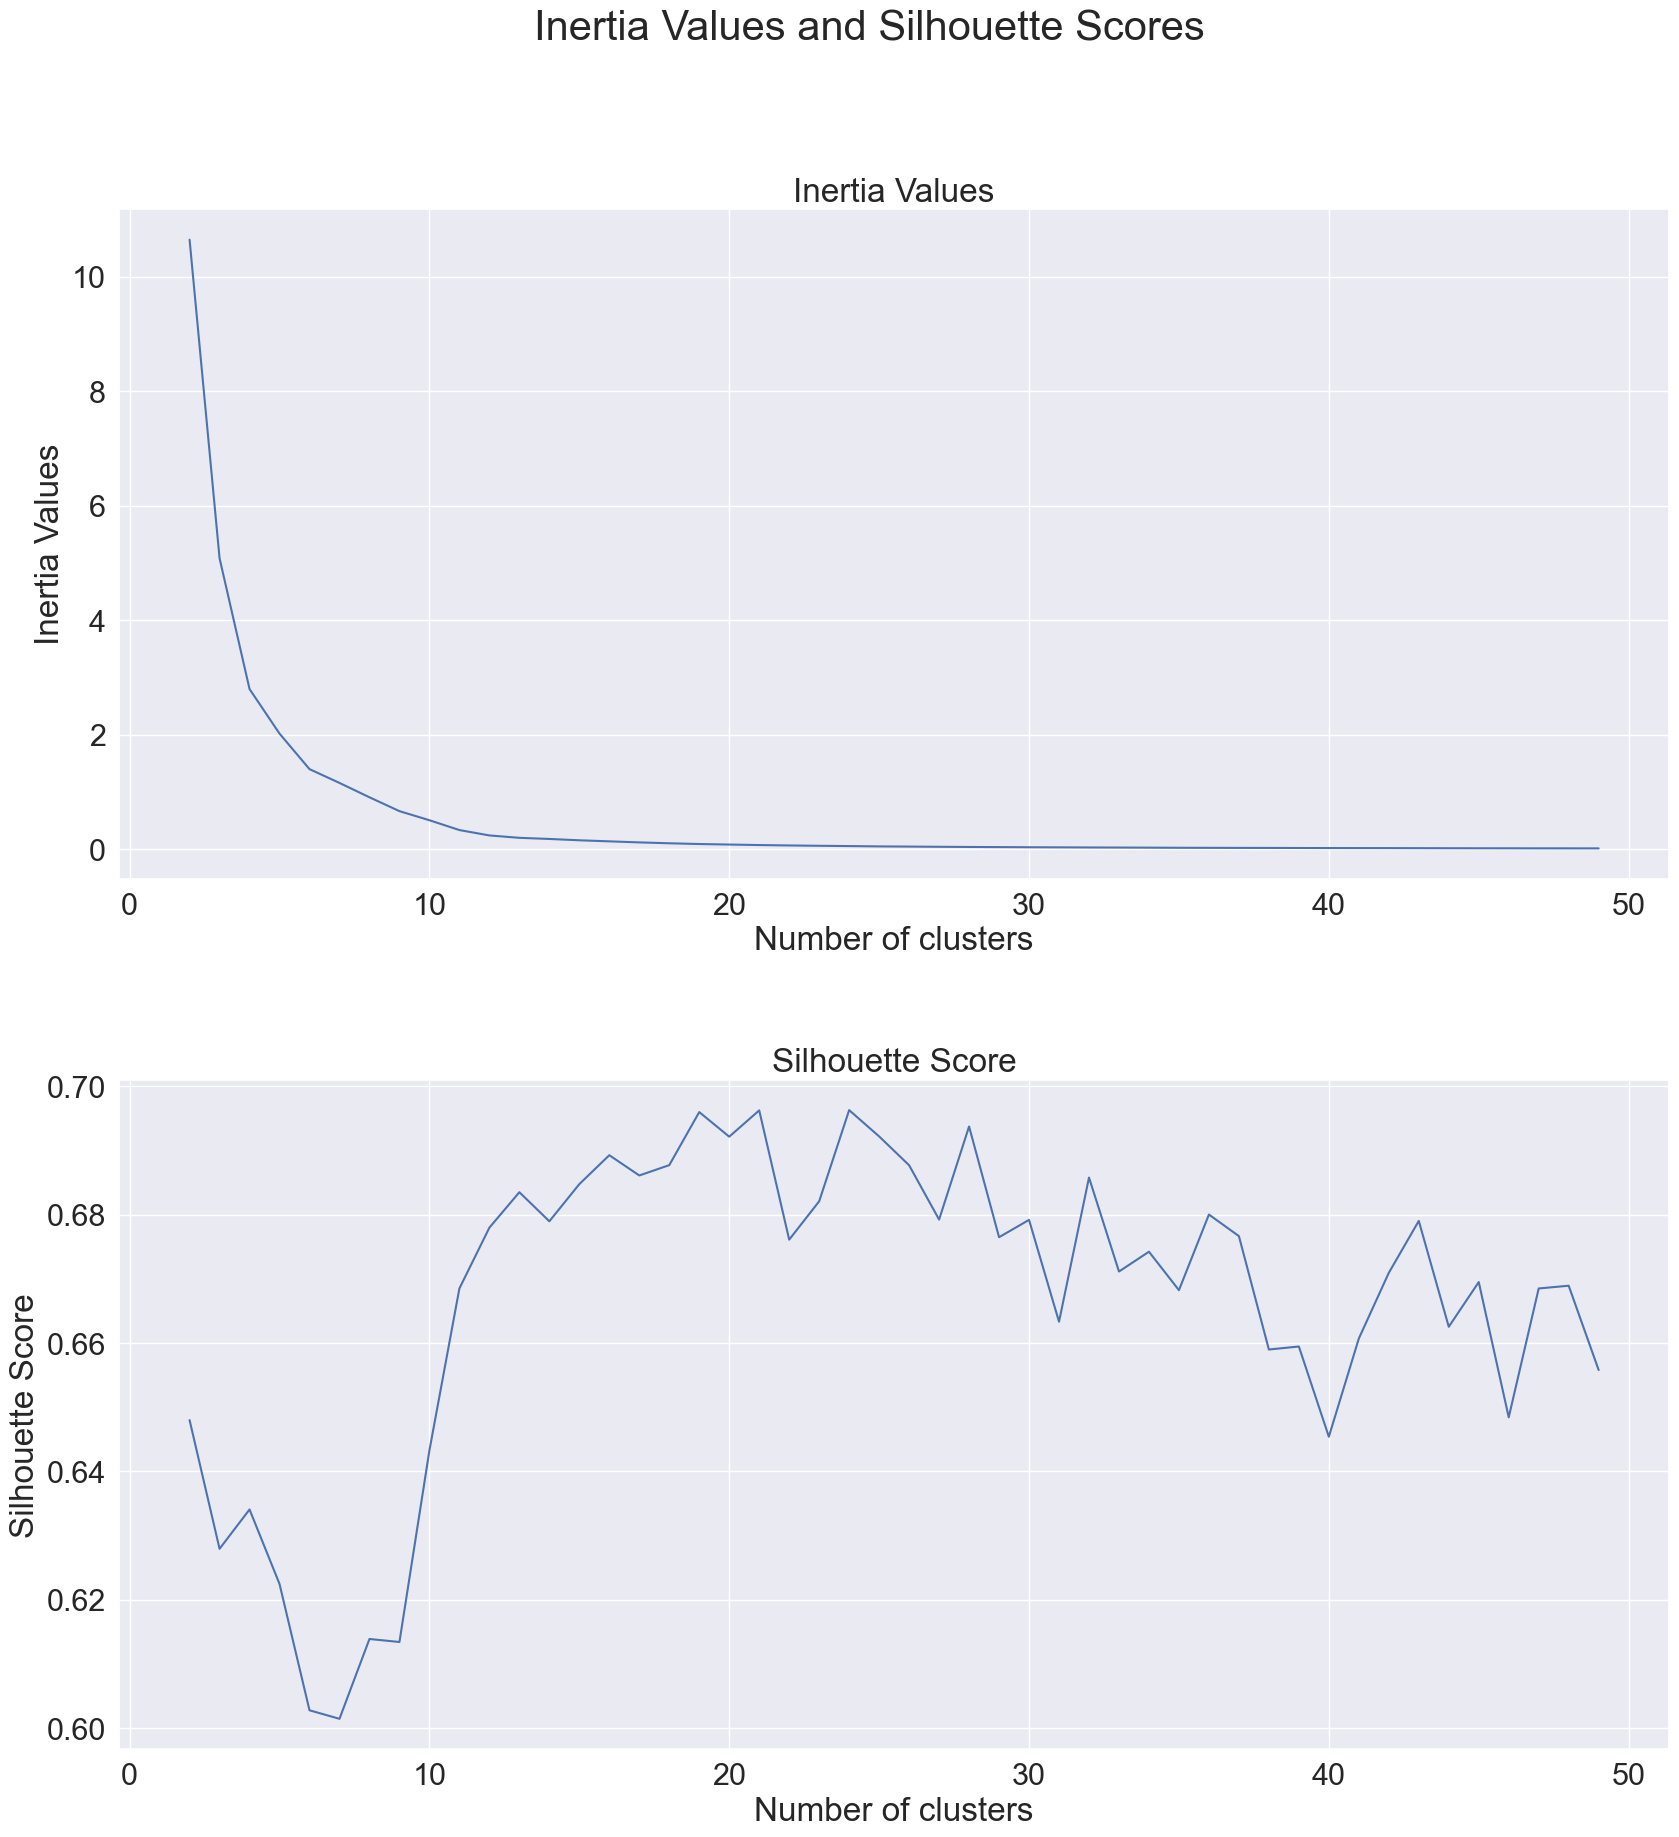

In [13]:
#plt.clf()
#plt.rcParams.update(plt.rcParamsDefault)

plt.rcdefaults() 

sns.set_style("darkgrid")
sns.set(font_scale=2)
figure, (ax1, ax2) = plt.subplots(2,1, sharex=False, sharey=False, figsize=(20,20))
figure.subplots_adjust(hspace=0.30)
figure.suptitle("Inertia Values and Silhouette Scores", fontsize=30)

sns.lineplot(data=Kmeans_scores, x='k_val', y='inertia_value',ax = ax1).set(title="Inertia Values", ylabel='Inertia Values'
                                                                            ,xlabel='Number of clusters')


sns.lineplot(data=Kmeans_scores, x='k_val', y='sil_score',ax = ax2).set(title="Silhouette Score", xlabel='Number of clusters'
                                                                        ,ylabel='Silhouette Score')

plt.show()

Sort the columns to see what number of clusters has the best.


In [14]:
Kmeans_scores.sort_values('sil_score', ascending=False).head(5)

,k_val,inertia_value,sil_score
22,24,0.052201,0.696307
19,21,0.070237,0.696267
17,19,0.088058,0.696002
26,28,0.036608,0.693756
23,25,0.046577,0.692207


### Create the model.

In [15]:
 k_means = KMeans(n_clusters=22, random_state=247, init='k-means++'
                         ,algorithm='elkan', max_iter=50, verbose =0)

In [16]:
# Fit the model. ***********************
k_means.fit(X_train_norm)

KMeans(algorithm='elkan', max_iter=50, n_clusters=22, random_state=247)

<Axes: xlabel='longitude', ylabel='latitude'>

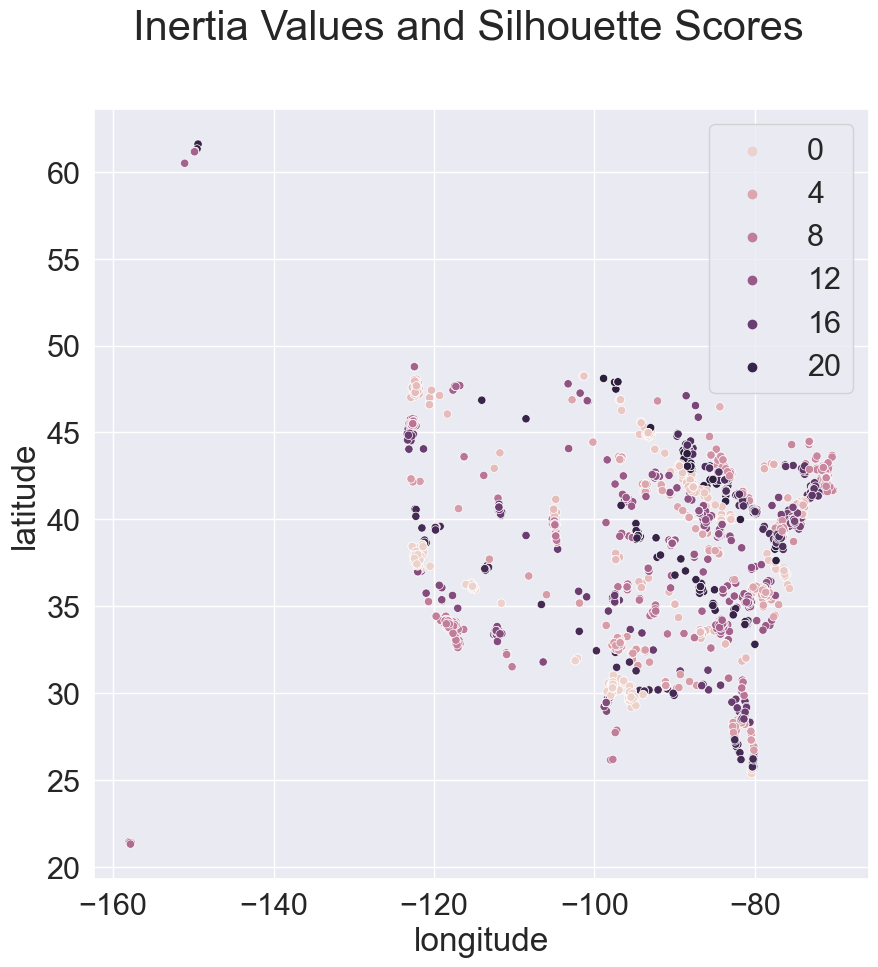

In [17]:
plt.rcdefaults() 

sns.set_style("darkgrid")
sns.set(font_scale=2)
figure, ax1 = plt.subplots(1,1, sharex=False, sharey=False, figsize=(10,10))
figure.subplots_adjust(hspace=0.30)
figure.suptitle("Inertia Values and Silhouette Scores", fontsize=30)


sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = k_means.labels_, ax=ax1)

In [18]:
#Add Labels to the Train data frame.
labeled_df = X_train.copy(deep=True)

In [19]:
print(labeled_df.head())

      latitude  longitude
5894   40.8876   -74.0499
875    40.8625   -74.0748
6580   38.2009   -85.6999
181    39.3903   -77.1487
8864   47.6160  -122.3275


In [20]:
labeled_df['Cluster'] =  k_means.labels_
labeled_df["apartment_price"] = y_train['price']

In [21]:
print(labeled_df.head())

      latitude  longitude  Cluster  apartment_price
5894   40.8876   -74.0499        3             2585
875    40.8625   -74.0748        3             1365
6580   38.2009   -85.6999        4              975
181    39.3903   -77.1487        6              200
8864   47.6160  -122.3275        2             2550


In [22]:
print(labeled_df[labeled_df['Cluster'] == 1])

      latitude  longitude  Cluster  apartment_price
7811   43.0724   -89.4003        1             2400
1610   44.9855   -93.3023        1             1400
7271   44.7594   -93.2817        1             1315
2376   41.8625   -87.6825        1             1140
6276   36.8379   -76.0939        1             1180
...        ...        ...      ...              ...
6416   37.0451   -76.3664        1             1380
6830   43.0724   -89.4003        1             1300
3031   44.9855   -93.3023        1             1675
4782   43.0724   -89.4003        1             1370
2554   44.9855   -93.3023        1             1169

[623 rows x 4 columns]


<Axes: xlabel='Cluster', ylabel='apartment_price'>

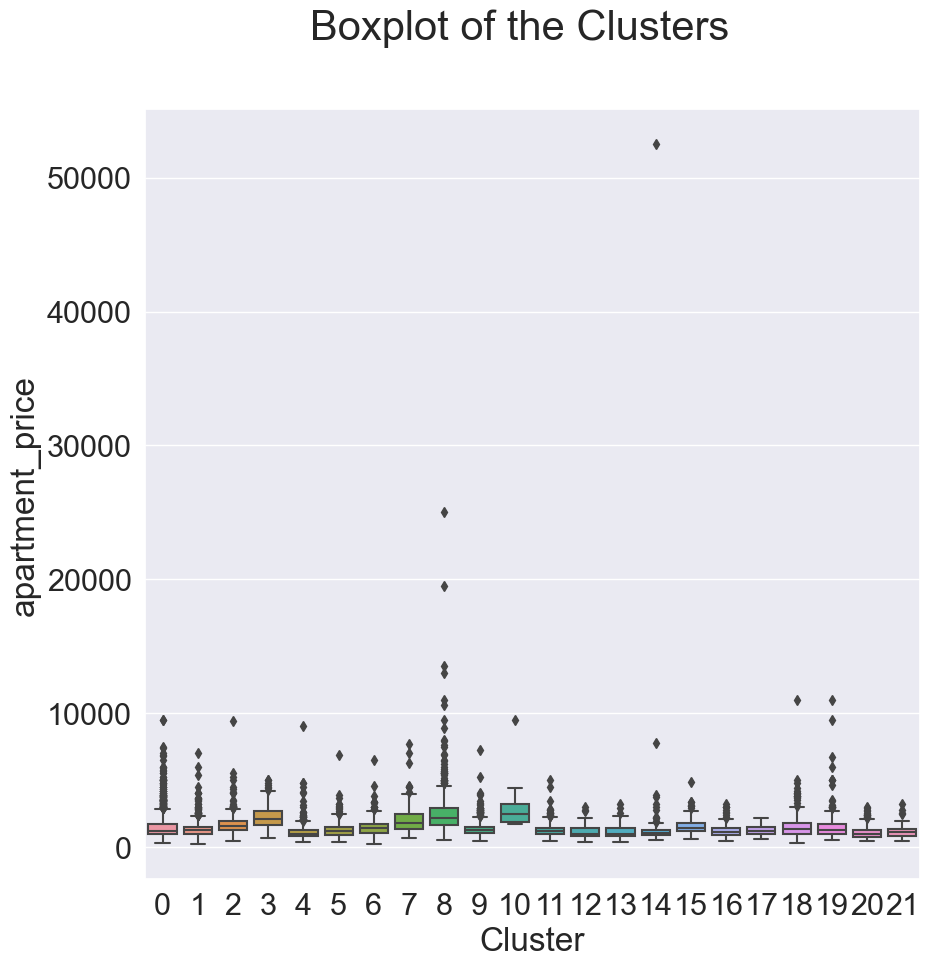

In [24]:
sns.set_style("darkgrid")
sns.set(font_scale=2)

figure, ax1 = plt.subplots(1,1, sharex=False, sharey=False, figsize=(10,10))
figure.subplots_adjust(hspace=0.30)
figure.suptitle("Boxplot of the Clusters", fontsize=30)

sns.boxplot(x = labeled_df['Cluster'], y =labeled_df['apartment_price'], ax = ax1)
